# Achieving Gross Margin

This notebook explores US Software companies, speficially their gross margins and what contributes it. It forms the [analysis for this blog post](https://jamesmalcolm.me/posts/achieving-gross-margin/).

It starts by plotting the spread of Gross Margin across the sector. I then plot Gross Margin against 52 Stock price gain to see if there is any correlation.

Later, I plot against Sales and Marketing expenditure to see if there's any relationship.

In [111]:
import pandas as pd
import numpy as np
import quandl
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# Define plotting style for the blog
rc = {
    'axes.axisbelow': True,
    'axes.edgecolor': '#FCFCFC',
    'axes.facecolor': '#3B424D',
    'figure.facecolor': '#3B424D',
    # 'axes.grid': True,
    'axes.labelcolor': '#FCFCFC',
    'axes.linewidth': 2,
    'font.family': 'Arial',
    'grid.color': '#C7CCDB',
    'grid.linestyle': '-',
    'legend.frameon': False,
    'legend.numpoints': 1,
    'legend.scatterpoints': 1,
    'lines.solid_capstyle': 'round',
    'pdf.fonttype': 42,
    'text.color': '#FCFCFC',
    'xtick.color': '#FCFCFC',
    'xtick.direction': 'out',
    'xtick.major.size': 1,
    'xtick.minor.size': 1,
    'ytick.color': '#FCFCFC',
    'ytick.direction': 'out',
    'ytick.major.size': 1,
    'ytick.minor.size': 1,
}
sns.set(context='notebook',
       rc=rc)

In [16]:
tickers = quandl.get_table('SHARADAR/TICKERS')

/Users/james.malcolm/anaconda3/envs/taxis/lib/python3.6/site-packages/quandl/get_table.py:38: UserWarning: To request more pages, please set paginate=True in your         quandl.get_table() call. For more information see our documentation:         https://github.com/quandl/quandl-python/blob/master/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


In [17]:
# Filter tickers to be US software and convert to list
softwares = tickers[(tickers['industry'] == 'Software - Application') & (tickers['isdelisted'] == 'N')]
ticker_list = np.unique(softwares.ticker).tolist()

In [19]:
raw = quandl.get_table('SHARADAR/SF1', ticker=ticker_list)

In [49]:
data_19 = raw[(raw['dimension'] == 'ARY') & (raw['reportperiod'].dt.year == 2019)]
data_18 = raw[(raw['dimension'] == 'ARY') & (raw['reportperiod'].dt.year == 2018)]

In [50]:
joined = data_19.merge(data_18, on='ticker', how='inner')

In [51]:
joined['52_week_gain'] = (joined['price_x'] - joined['price_y']) / joined['price_y']

In [52]:
joined['rev_gain'] = joined['revenue_x'] - joined['revenue_y']
joined['rev_gain_percent'] = (joined['revenue_x'] - joined['revenue_y']) / joined['revenue_y']

In [53]:
joined.head()

,ticker,dimension_x,calendardate_x,datekey_x,reportperiod_x,lastupdated_x,accoci_x,assets_x,assetsavg_x,assetsc_x,...,sps_y,tangibles_y,taxassets_y,taxexp_y,taxliabilities_y,tbvps_y,workingcapital_y,52_week_gain,rev_gain,rev_gain_percent
0,PEGA,ARY,2019-12-31,2020-02-12,2019-12-31,2020-02-13,-13228000.0,9.848120e+08,9.497530e+08,5.056100e+08,...,11.348,9.096950e+08,0.000000e+00,-22160000.0,6939000.0,11.579,278826000.0,0.527937,19802000.0,0.022210
1,PCYG,ARY,2019-12-31,2019-09-12,2019-06-30,2020-02-11,0.0,5.294054e+07,5.199498e+07,2.654887e+07,...,1.125,2.732096e+07,0.000000e+00,105395.0,0.0,1.395,15743569.0,-0.159341,-866670.0,-0.039329
2,PCTY,ARY,2019-12-31,2019-08-09,2019-06-30,2020-02-05,112000.0,1.803941e+09,1.735848e+09,1.596189e+09,...,7.201,1.463913e+09,2.214000e+07,-21847000.0,0.0,27.924,107395000.0,0.635772,90106000.0,0.238674
3,PAYC,ARY,2019-12-31,2020-02-13,2019-12-31,2020-02-14,0.0,2.486917e+09,1.991991e+09,1.871100e+09,...,9.813,1.469292e+09,3.962000e+06,37646000.0,70206000.0,25.459,35940000.0,0.700247,171335000.0,0.302532
4,OTEX,ARY,2019-12-31,2019-08-01,2019-06-30,2020-01-30,24124000.0,7.933975e+09,7.786766e+09,1.561328e+09,...,10.580,2.888263e+09,1.202834e+09,143826000.0,290413000.0,10.855,332981000.0,0.122881,53514000.0,0.019009


In [54]:
data = joined[joined.columns.drop(list(joined.filter(regex='_y')))]
cols = [col[:-2] for col in data.columns]
data.columns = cols

In [55]:
data.head()

,tick,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital,52_week_ga,rev_ga,rev_gain_perce
0,PEGA,ARY,2019-12-31,2020-02-12,2019-12-31,2020-02-13,-13228000.0,9.848120e+08,9.497530e+08,5.056100e+08,...,11.528,9.057730e+08,0.000000e+00,-44413000.0,0.0,11.458,127655000.0,0.527937,19802000.0,0.022210
1,PCYG,ARY,2019-12-31,2019-09-12,2019-06-30,2020-02-11,0.0,5.294054e+07,5.199498e+07,2.654887e+07,...,1.067,3.119739e+07,0.000000e+00,142710.0,0.0,1.572,17746257.0,-0.159341,-866670.0,-0.039329
2,PCTY,ARY,2019-12-31,2019-08-09,2019-06-30,2020-02-05,112000.0,1.803941e+09,1.735848e+09,1.596189e+09,...,8.838,1.756114e+09,6.472000e+06,4223000.0,6943000.0,33.188,140141000.0,0.635772,90106000.0,0.238674
3,PAYC,ARY,2019-12-31,2020-02-13,2019-12-31,2020-02-14,0.0,2.486917e+09,1.991991e+09,1.871100e+09,...,12.815,2.435028e+09,4.020000e+06,45511000.0,91217000.0,42.303,117578000.0,0.700247,171335000.0,0.302532
4,OTEX,ARY,2019-12-31,2019-08-01,2019-06-30,2020-01-30,24124000.0,7.933975e+09,7.786766e+09,1.561328e+09,...,10.673,3.017563e+09,1.080759e+09,154937000.0,291214000.0,11.227,546611000.0,0.122881,53514000.0,0.019009


## How does Gross Margin differ within the sector?

Let's make a simple bar graph to explore the differing gross margins:

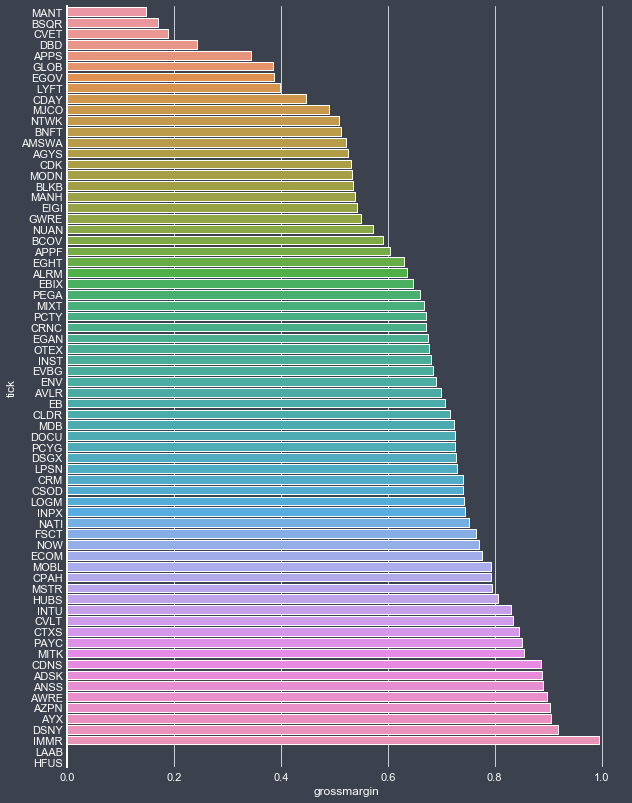

In [182]:
plt.figure(figsize=(10,14))
sns.barplot(x='grossmargin', y='tick', data=data.sort_values('grossmargin'))
sns.despine(bottom=True)
plt.show();

/Users/james.malcolm/anaconda3/envs/taxis/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


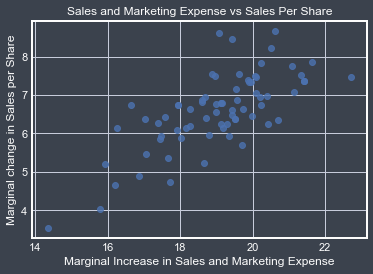

In [184]:
sns.regplot(x=np.log(data['sgna']), y=np.log(data['sps'] * 100), data=data, ci=None)
plt.title("Sales and Marketing Expense vs Sales Per Share")
plt.xlabel("Marginal Increase in Sales and Marketing Expense")
plt.ylabel("Marginal change in Sales per Share")
plt.show();

## To what degree does Sales and Marketing expense influence Gross Margin?

The logic behind this is that increasing S&M spend increases Revenue, therefore potentially Gross Margin if COGS stay the same.

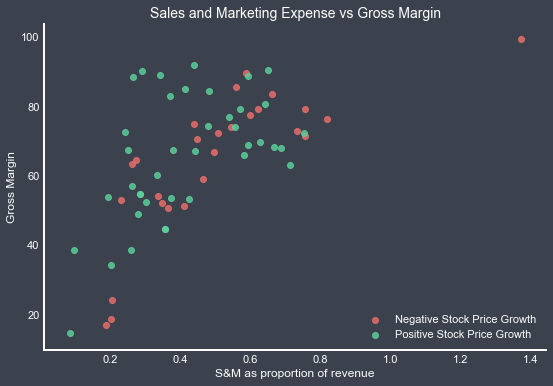

In [204]:
plt.figure(figsize=(9,6))
sns.regplot(x=data[(data['52_week_ga'] <= 0) & (data['tick'] != 'INPX')]['sgna'] / data[(data['52_week_ga'] <= 0) & (data['tick'] != 'INPX')]['revenue'],
            y=data[(data['52_week_ga'] <= 0) & (data['tick'] != 'INPX')]['grossmargin'] * 100,
            data=data[(data['52_week_ga'] <= 0) & (data['tick'] != 'INPX')],
            fit_reg=False,
            ci=None,
            color='#EF6F6C',
            label='Negative Stock Price Growth'
           )
sns.regplot(x=data[data['52_week_ga'] >= 0]['sgna'] / data[data['52_week_ga'] >= 0]['revenue'],
            y=data[data['52_week_ga'] >= 0]['grossmargin'] * 100,
            data=data[data['52_week_ga'] >= 0],
            fit_reg=False,
            ci=None,
            color='#5DD39E',
            label='Positive Stock Price Growth'
           )
plt.title("Sales and Marketing Expense vs Gross Margin", size=14)
plt.xlabel("S&M as proportion of revenue")
plt.ylabel("Gross Margin")
sns.despine()
plt.legend(loc=4)
plt.grid(False)
plt.savefig('./images/graphs/grossmargin-snga_by_gm.png', facecolor="#3B424D")
plt.show();

From this graph, I became interested in the cluster of green companies who have > 80% Gross Margin and < 50% S&M expenditure.

In [186]:
good_companies = data[(data['52_week_ga'] >= 0) & (data['grossmargin'] > 0.8) & (data['snga_revenue'] < 0.5)][['tick', 'grossmargin', 'snga_revenue', '52_week_ga', 'rev_gain_perce']]

In [187]:
others = data[~data['tick'].isin(good_companies['tick']) ][['tick', 'grossmargin', 'snga_revenue', '52_week_ga', 'rev_gain_perce']]

In [188]:
others.describe()

,grossmargin,snga_revenue,52_week_ga,rev_gain_perce
count,66.000000,68.000000,62.000000,67.000000
mean,0.622136,inf,0.102621,0.134242
std,0.180238,NaN,0.534978,0.275881
min,0.148000,0.085835,-0.942599,-1.000000
25%,0.526250,0.283821,-0.211125,0.020609
50%,0.671500,0.473647,0.031154,0.108035
75%,0.740750,0.625317,0.426312,0.255932
max,0.995000,inf,2.408986,0.728046


In [189]:
good_companies.describe()

,grossmargin,snga_revenue,52_week_ga,rev_gain_perce
count,7.000000,7.000000,7.000000,7.000000
mean,0.875143,0.373338,0.282861,0.138706
std,0.032708,0.078953,0.218383,0.096892
min,0.831000,0.266008,0.014000,0.012328
25%,0.848500,0.317819,0.165945,0.074465
50%,0.886000,0.372052,0.242646,0.137492
75%,0.896500,0.428452,0.345624,0.184831
max,0.919000,0.482762,0.700247,0.302532


In [190]:
data['snga_revenue'] = data['sgna'] / data['revenue']

/Users/james.malcolm/anaconda3/envs/taxis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


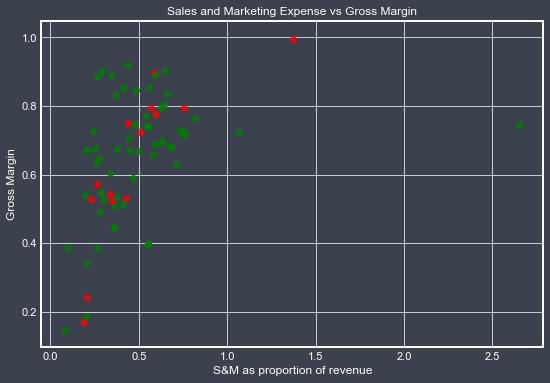

In [191]:
plt.figure(figsize=(9,6))
sns.regplot(x=data[(data['rev_gain_perce'] <= 0)]['snga_revenue'],
            y='grossmargin',
            data=data[data['rev_gain_perce'] <= 0],
            fit_reg=False,
            ci=None,
            color='red'
           )
sns.regplot(x=data[data['rev_gain_perce'] >= 0]['snga_revenue'],
            y='grossmargin',
            data=data[data['rev_gain_perce'] >= 0],
            fit_reg=False,
            ci=None,
            color='green'
           )
plt.title("Sales and Marketing Expense vs Gross Margin")
plt.xlabel("S&M as proportion of revenue")
plt.ylabel("Gross Margin")
plt.show();

In [193]:
data['above_gm'] = np.where(data['grossmargin'] > data['grossmargin'].mean(), 1, 0)

/Users/james.malcolm/anaconda3/envs/taxis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


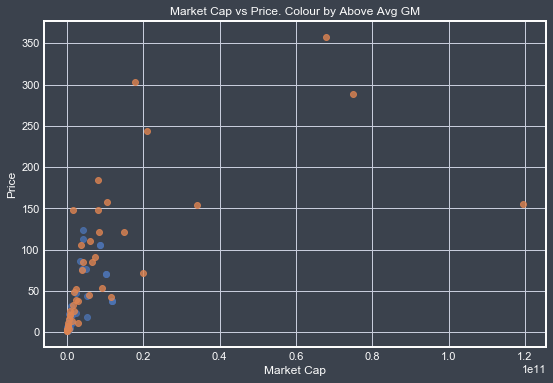

In [194]:
plt.figure(figsize=(9,6))
sns.regplot(x='marketcap', y='price', data=data[data['above_gm'] == 0], ci=None, fit_reg=False)
sns.regplot(x='marketcap', y='price', data=data[data['above_gm'] == 1], ci=None, fit_reg=False)
plt.title("Market Cap vs Price. Colour by Above Avg GM")
plt.xlabel("Market Cap")
plt.ylabel("Price")
plt.show();

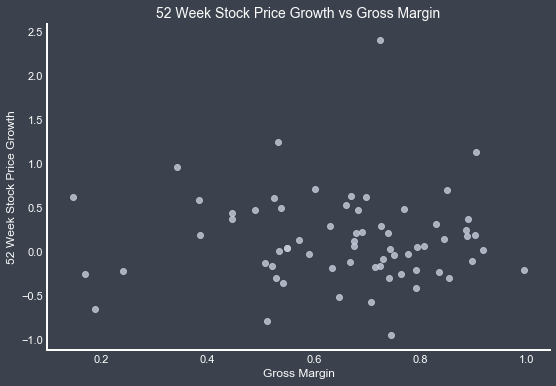

In [205]:
plt.figure(figsize=(9,6))
sns.regplot(x='grossmargin', y='52_week_ga', color='#C7CCDB', data=data, ci=None, fit_reg=False)
plt.title("52 Week Stock Price Growth vs Gross Margin", size=14)
plt.xlabel("Gross Margin")
plt.ylabel("52 Week Stock Price Growth")
sns.despine()
plt.grid(False)
plt.savefig('./images/graphs/grossmargin-gm_byStockPrice.png', facecolor="#3B424D")
plt.show();

In [128]:
import statsmodels.formula.api as smf

data['year_ga'] = data['52_week_ga']

results = smf.ols('year_ga ~ grossmargin', data=data).fit()

/Users/james.malcolm/anaconda3/envs/taxis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                year_ga   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                  0.006502
Date:                Wed, 11 Mar 2020   Prob (F-statistic):              0.936
Time:                        16:57:33   Log-Likelihood:                -49.257
No. Observations:                  67   AIC:                             102.5
Df Residuals:                      65   BIC:                             106.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1558      0.229      0.680      